In [1]:
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
    SpectralClustering,
    Birch
)

from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    homogeneity_completeness_v_measure,
    silhouette_score
)

In [2]:
features = []
with open("./UCI HAR Dataset/features.txt") as f:
    features = [line.split()[-1] for line in f.readlines()]

In [3]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [4]:
X_train = np.loadtxt("./UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("./UCI HAR Dataset/train/y_train.txt")

In [6]:
train = pd.DataFrame(X_train, columns=features)

In [7]:
X_test = np.loadtxt("./UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt("./UCI HAR Dataset/test/y_test.txt")

In [8]:
test = pd.DataFrame(X_test, columns=features)

In [9]:
n_clusters = len(np.unique(y_train))

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_train)

kmeans_clusters = kmeans.fit_predict(X_test)
kmeans_clusters

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


array([2, 2, 5, ..., 3, 3, 3])

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=n_clusters)
agg.fit(X_train)

agg_clusters = agg.fit_predict(X_test)
agg_clusters

array([4, 3, 3, ..., 0, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score


def metrics_(clusters, y_test, alg):
    print(alg)
    
    ari = adjusted_rand_score(y_test, clusters)
    print(f"Adjusted Rand Index: {ari:.2f}")
    
    ami = adjusted_mutual_info_score(y_test, clusters)
    print(f"Adjusted Mutual Information: {ami:.2f}")
    
    homogeneity = homogeneity_score(y_test, clusters)
    print(f"Homogeneity: {homogeneity:.2f}")
    
    completeness = completeness_score(y_test, clusters)
    print(f"Completeness: {completeness:.2f}")
    
    v_measure = v_measure_score(y_test, clusters)
    print(f"V_measure: {v_measure:.2f}")
    
    print("\n")
    
metrics_(kmeans_clusters, y_test, 'k-means')
metrics_(agg_clusters, y_test, 'AgglomerativeClustering')

k-means
Adjusted Rand Index: 0.48
Adjusted Mutual Information: 0.61
Homogeneity: 0.60
Completeness: 0.62
V_measure: 0.61


AgglomerativeClustering
Adjusted Rand Index: 0.49
Adjusted Mutual Information: 0.63
Homogeneity: 0.62
Completeness: 0.65
V_measure: 0.63




In [14]:
kmeans_clusters

array([2, 2, 5, ..., 3, 3, 3])

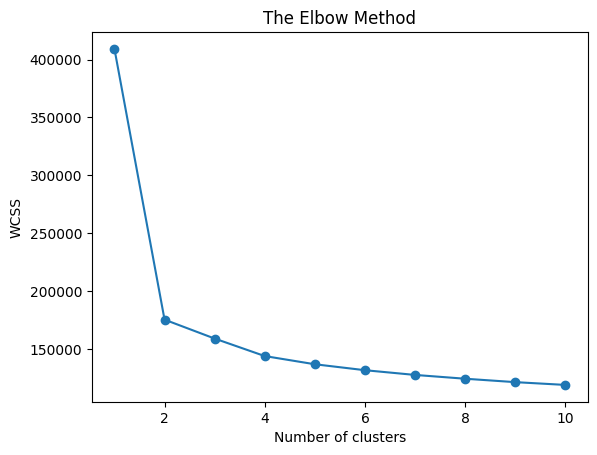

In [15]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
n_clusters = 2

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_train)

kmeans_clusters = kmeans.fit_predict(X_test)
kmeans_clusters

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0])

In [19]:
metrics_(kmeans_clusters, y_test, 'k-means')

k-means
Adjusted Rand Index: 0.33
Adjusted Mutual Information: 0.55
Homogeneity: 0.38
Completeness: 0.99
V_measure: 0.55


